In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score

# from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score,confusion_matrix
encorder = LabelEncoder()

In [2]:
train_df = pd.read_csv('./Dataset/Training.csv')
test_df = pd.read_csv('./Dataset/Testing.csv')

In [3]:
combined_df = pd.concat([train_df, test_df], ignore_index=True)
df = combined_df

In [4]:
df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4957,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4959,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN
4960,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,Impetigo,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4962 entries, 0 to 4961
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.1+ MB


In [6]:
df.shape

(4962, 134)

In [7]:
df.dtypes

itching                   int64
skin_rash                 int64
nodal_skin_eruptions      int64
continuous_sneezing       int64
shivering                 int64
                         ...   
blister                   int64
red_sore_around_nose      int64
yellow_crust_ooze         int64
prognosis                object
Unnamed: 133            float64
Length: 134, dtype: object

In [8]:
df.isna().sum()[df.isna().sum() > 0] # colunms with null values 

Unnamed: 133    4962
dtype: int64

In [9]:
df = df.iloc[:, :-1]

In [10]:
df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4957,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4959,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis
4960,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Impetigo


In [11]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
y = encorder.fit_transform(y)


In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [13]:

models ={
    'naive bayes' : GaussianNB(),
    'KNN' : KNeighborsClassifier(n_neighbors=5),
    'svm' : SVC(),
    'randome forest' : RandomForestClassifier(),
    'decision tree' : DecisionTreeClassifier()
}

In [14]:
# Using K-Fold Cross-Validation for model selection

def find_best_model (models):
    for model_name in models:
        model = models[model_name]
        score = cross_val_score(
            model, x, y, cv=10, scoring='accuracy'
        )
        
        print(model_name)
        print(score)
        print(np.mean(score))
        print('*'*50)

find_best_model(models)

#  i took naivebase,svm , and KNN for model creation
    

naive bayes
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0
**************************************************
KNN
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0
**************************************************
svm
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0
**************************************************
randome forest
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.99798387]
0.9997983870967742
**************************************************
decision tree
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.99798387]
0.9997983870967742
**************************************************


knn model
accuracy is 100.0


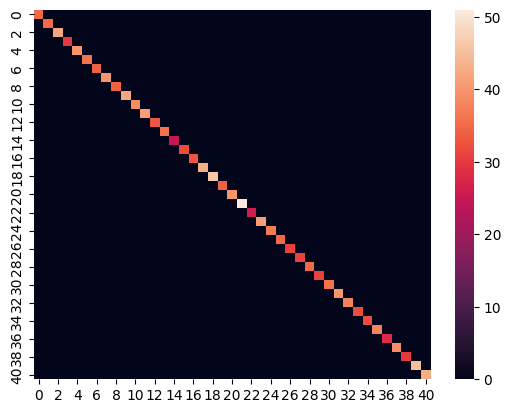

----------------------------------------------------------------------------------------------------
svm model
accuracy is 100.0


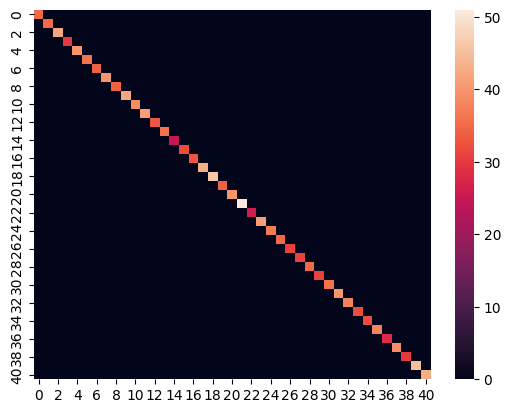

----------------------------------------------------------------------------------------------------
naive_bayes
accuracy is 100.0
----------------------------------------------------------------------------------------------------


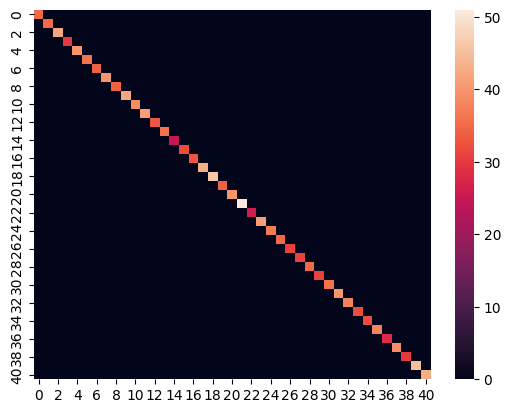

In [15]:
# traning the model and make the predition 
# --------------------------------------------
# traning and testing the kNN model
k_model = KNeighborsClassifier(n_neighbors=5)
k_model.fit(x_train,y_train)
pred = k_model.predict(x_test)
print(f"knn model")
print(f'accuracy is { accuracy_score(pred,y_test)*100}')
confu_me = confusion_matrix(y_test,pred)
sb.heatmap(confu_me)
plt.show()

print('-'*100)

svm = SVC()
svm.fit(x_train,y_train)
pred = svm.predict(x_test)
print(f"svm model")
print(f'accuracy is { accuracy_score(pred,y_test)*100}')
confu_me = confusion_matrix(y_test,pred)
sb.heatmap(confu_me)
plt.show()

print('-'*100)

naive_bayes = GaussianNB()
naive_bayes.fit(x_train,y_train)
pred = naive_bayes.predict(x_test)
print(f"naive_bayes")
print(f'accuracy is { accuracy_score(pred,y_test)*100}')
confu_me = confusion_matrix(y_test,pred)
sb.heatmap(confu_me)
plt.show

print('-'*100)

In [16]:
# Training the models on whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_knn_model = KNeighborsClassifier(n_neighbors=5)
final_svm_model.fit(x, y)
final_nb_model.fit(x, y)
final_knn_model.fit(x, y)

# # Reading the test data
# encorder = LabelEncoder()
# test_X = x_test
# test_Y = encorder.fit_transform(y_test)

# test_Y

# # Making prediction by take mode of predictions 
# # made by all the classifiers
# svm_preds = final_svm_model.predict(test_X)
# nb_preds = final_nb_model.predict(test_X)
# rf_preds = final_rf_model.predict(test_X)

# from scipy import stats

# final_preds = [stats.mode([i, j, k], keepdims=True).mode[0] for i, j, k in zip(svm_preds, nb_preds, rf_preds)]

# # Convert final_preds to a NumPy array for compatibility with accuracy_score
# final_preds = np.array(final_preds)

# # Calculate accuracy
# print(f"Accuracy on Test dataset by the combined model: {accuracy_score(test_Y, final_preds) * 100:.2f}%")

# # Confusion matrix
# cf_matrix = confusion_matrix(test_Y, final_preds)
# plt.figure(figsize=(12, 8))
# sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
# plt.title("Confusion Matrix for Combined Model on Test Dataset")
# plt.show()


KNeighborsClassifier()

In [17]:
print(pred)

[39 10 40 ... 20 17 36]


In [ ]:
symptoms = x.columns
print(symptoms)

# Creating a symptom index dictionary to encode the
# input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":encorder.classes_
}

# Defining the Function
# Input: string containing symptoms separated by commas
# Output: Generated predictions by models
def predictDisease(symptoms):
    symptoms = symptoms.split(",")
    
    # creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1
        
    # reshaping the input data and converting it
    # into suitable format for model predictions
    input_data = np.array(input_data).reshape(1,-1)
    
    # generating individual outputs
    rf_prediction = data_dict["predictions_classes"][final_knn_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]
    
    # making final prediction by taking mode of all predictions
    # Use statistics.mode instead of scipy.stats.mode
    import statistics
    final_prediction = statistics.mode([rf_prediction, nb_prediction, svm_prediction])  # ensample model
    predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction":final_prediction
    }
    return predictions

# Testing the function
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))


Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling',
       'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails',
       'blister', 'red_sore_around_nose', 'yellow_crust_ooze'],
      dtype='object', length=132)
{'rf_model_prediction': 'Fungal infection', 'naive_bayes_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'final_prediction': 'Fungal infection'}


C:\Users\Achu Raj\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Achu Raj\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\Achu Raj\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
